# SEC61A1
SEC61 complex, alpha-1 subunit (SEC61A1), is a subunit of the heteromeric SEC61 complex, which also contains beta (SEC61B; 609214) and gamma (SEC61G; 609215) subunits. The SEC61 complex forms the core of the mammalian endoplasmic reticulum (ER) translocon (See [OMIM:609213]). Pathogenic variants in SEC61A1 are associated with
[Neutropenia, severe congenital, 11, autosomal dominant (OMIM:620674)](https://omim.org/entry/620674),
[Immunodeficiency, common variable, 15 (OMIM:620670)](https://omim.org/entry/620670), and
[Tubulointerstitial kidney disease, autosomal dominant, 5 (OMIM:617056)](https://omim.org/entry/617056).

In [1]:
import gpsea
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2024-12-12
Using gpsea version 0.9.2


In [2]:
gene_symbol = 'SEC61A1'
mane_tx_id = 'NM_013336.4'
mane_protein_id = 'NP_037468.1' # protein transport protein Sec61 subunit alpha isoform 1 isoform 1

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

phenopacket_store_release = '0.1.23'  
registry = configure_phenopacket_registry()

with registry.open_phenopacket_store(release=phenopacket_store_release) as ps:
    cdls6_phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

cohort_creator   = configure_caching_cohort_creator(hpo)
cohort, qc = load_phenopackets(
    phenopackets=cdls6_phenopackets, 
    cohort_creator=cohort_creator,
)
qc.summarize()

Individuals Processed: 100%|██████████| 19/19 [00:14<00:00,  1.28 individuals/s]
Validated under permissive policy
No errors or warnings were found


In [4]:
from gpsea.view import CohortViewer

cv = CohortViewer(hpo)
cv.process(cohort, transcript_id=mane_tx_id)

n,HPO Term
10,Decreased circulating IgG concentration
10,Decreased specific antibody response to protein-conjugated polysaccharide vaccine
9,Decreased specific antibody response to polysaccharide vaccine
8,Decreased circulating IgA concentration
7,Decreased circulating total IgM
7,Small for gestational age
7,Elevated circulating creatinine concentration
7,Anemia
7,Recurrent otitis media
5,Chronic kidney disease


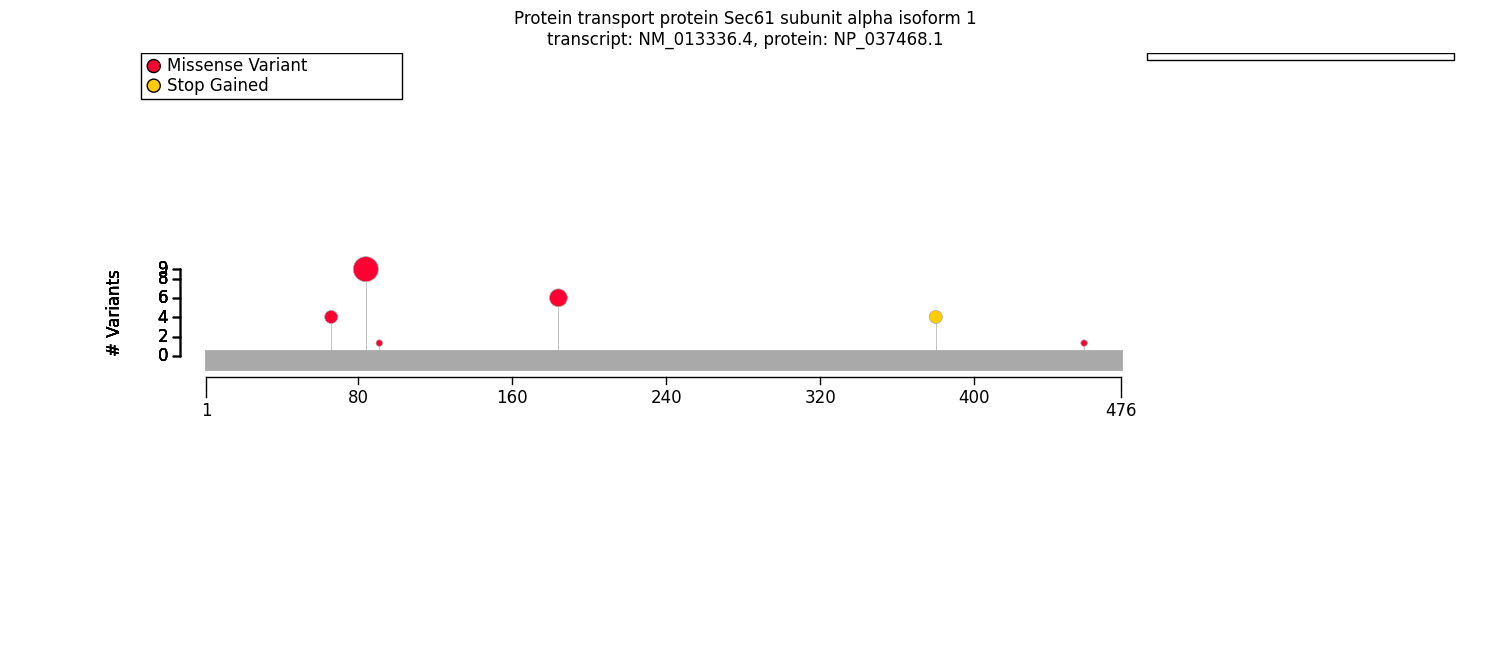

In [6]:
from gpsea.model.genome import GRCh38
from gpsea.preprocessing import configure_default_protein_metadata_service, VVMultiCoordinateService
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

txc_service = VVMultiCoordinateService(genome_build=GRCh38)
pms = configure_default_protein_metadata_service()
tx_coordinates = txc_service.fetch(mane_tx_id)
protein_meta = pms.annotate(mane_protein_id)
sec61a1_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein_diagram(
    tx_coordinates,
    protein_meta,
    cohort,
    ax=ax,
)
sec61a1_fig.tight_layout()

# Genotype-Phenotype Correlation (GPC) Analysis

In [7]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest

analysis = configure_hpo_term_analysis(hpo)
pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [9]:
from gpsea.view import MtcStatsViewer
from gpsea.analysis.predicate import variant_key
from gpsea.analysis.clf import monoallelic_classifier

val85asp = variant_key("3_128056742_128056742_T_A") # p.Val85Asp
val85asp_clf = monoallelic_classifier(
    a_predicate=val85asp,
    b_predicate= ~val85asp,
    a_label='p.Val85Asp', 
    b_label='Other variant'
)
val85asp_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=val85asp_clf,
    pheno_clfs=pheno_clfs,
)
viewer = MtcStatsViewer()
viewer.process(val85asp_result)

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.4,25
HMF03,Skipping term because of a child term with the same individual counts,3
HMF05,Skipping term because one genotype had zero observations,6
HMF08,Skipping general term,76
HMF09,Skipping term with maximum annotation frequency that was less than threshold 0.4,143


In [10]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=val85asp_result)

Allele group                                       p.Val85Asp          \
                                                        Count Percent   
Recurrent lower respiratory tract infections [H...        6/6    100%   
Elevated circulating creatinine concentration [...        0/4      0%   
Anemia [HP:0001903]                                       0/4      0%   
Recurrent respiratory infections [HP:0002205]             6/6    100%   
Decreased circulating IgA concentration [HP:000...        8/9     89%   
Recurrent infections [HP:0002719]                         8/8    100%   
Decreased circulating IgG concentration [HP:000...        9/9    100%   
Decreased circulating total IgM [HP:0002850]              7/9     78%   
Recurrent upper respiratory tract infections [H...        2/2    100%   
Unusual infection [HP:0032101]                            8/8    100%   
Abnormal circulating IgG concentration [HP:0410...        9/9    100%   
Abnormal circulating immunoglobulin concentrati...        9/9    100%   
Decreased circulating antibody concentration [H...        9/9    100%   
Abnormal circulating IgA concentration [HP:0410...        8/8    100%   
Decreased specific antibody response to protein...        8/9     89%   
Decreased specific antibody response to vaccina...        9/9    100%   
Increased inflammatory response [HP:0012649]              6/6    100%   
Recurrent otitis media [HP:0000403]                       4/9     44%   

Allele group                                       Other variant          \
                                                           Count Percent   
Recurrent lower respiratory tract infections [H...           0/5      0%   
Elevated circulating creatinine concentration [...           7/8     88%   
Anemia [HP:0001903]                                          7/8     88%   
Recurrent respiratory infections [HP:0002205]                1/6     17%   
Decreased circulating IgA concentration [HP:000...           0/3      0%   
Recurrent infections [HP:0002719]                           5/10     50%   
Decreased circulating IgG concentration [HP:000...           1/3     33%   
Decreased circulating total IgM [HP:0002850]                 0/3      0%   
Recurrent upper respiratory tract infections [H...           1/6     17%   
Unusual infection [HP:0032101]                               5/5    100%   
Abnormal circulating IgG concentration [HP:0410...           2/2    100%   
Abnormal circulating immunoglobulin concentrati...           3/3    100%   
Decreased circulating antibody concentration [H...           2/2    100%   
Abnormal circulating IgA concentration [HP:0410...           1/1    100%   
Decreased specific antibody response to protein...           2/2    100%   
Decreased specific antibody response to vaccina...           2/2    100%   
Increased inflammatory response [HP:0012649]                 5/5    100%   
Recurrent otitis media [HP:0000403]                          3/8     38%   

Allele group                                                           \
                                                   Corrected p values   
Recurrent lower respiratory tract infections [H...           0.038961   
Elevated circulating creatinine concentration [...           0.060606   
Anemia [HP:0001903]                                          0.060606   
Recurrent respiratory infections [HP:0002205]                0.065455   
Decreased circulating IgA concentration [HP:000...           0.065455   
Recurrent infections [HP:0002719]                            0.102273   
Decreased circulating IgG concentration [HP:000...           0.102273   
Decreased circulating total IgM [HP:0002850]                 0.102273   
Recurrent upper respiratory tract infections [H...           0.214286   
Unusual infection [HP:0032101]                               1.000000   
Abnormal circulating IgG concentration [HP:0410...           1.000000   
Abnormal circulating immunoglobulin concentrati...           1.000000

In [11]:
from gpsea.analysis.clf import sex_classifier

mf_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=sex_classifier(),
    pheno_clfs=pheno_clfs,
)

summarize_hpo_analysis(hpo=hpo, result=mf_result)

Sex                                                FEMALE          MALE  \
                                                    Count Percent Count   
Decreased circulating IgA concentration [HP:000...    1/4     25%   7/8   
Decreased circulating IgG concentration [HP:000...    2/4     50%   8/8   
Decreased circulating total IgM [HP:0002850]          1/4     25%   6/8   
Recurrent lower respiratory tract infections [H...    1/4     25%   5/7   
Decreased specific antibody response to protein...    2/3     67%   8/8   
Elevated circulating creatinine concentration [...    4/5     80%   3/7   
Anemia [HP:0001903]                                   4/5     80%   3/7   
Recurrent infections [HP:0002719]                     4/7     57%  9/11   
Hyperuricemia [HP:0002149]                            4/5     80%   1/3   
Recurrent respiratory infections [HP:0002205]         2/5     40%   5/7   
Recurrent otitis media [HP:0000403]                   2/7     29%  5/10   
Unusual infection [HP:0032101]                        4/4    100%   9/9   
Abnormal circulating IgG concentration [HP:0410...    3/3    100%   8/8   
Abnormal circulating immunoglobulin concentrati...    4/4    100%   8/8   
Decreased circulating antibody concentration [H...    3/3    100%   8/8   
Abnormal circulating IgA concentration [HP:0410...    2/2    100%   7/7   
Decreased specific antibody response to vaccina...    3/3    100%   8/8   
Decreased specific antibody response to polysac...    2/2    100%   7/7   
Neutropenia [HP:0001875]                              3/5     60%   1/3   
Increased inflammatory response [HP:0012649]          4/4    100%   7/7   
Abnormality of the kidney [HP:0000077]                5/5    100%   3/3   
Abnormal circulating nitrogen compound concentr...    5/5    100%   3/3   
Azotemia [HP:0002157]                                 5/5    100%   3/3   
Recurrent upper respiratory tract infections [H...    2/5     40%   1/3   

Sex                                                                            \
                                                   Percent Corrected p values   
Decreased circulating IgA concentration [HP:000...     88%           0.977941   
Decreased circulating IgG concentration [HP:000...    100%           0.977941   
Decreased circulating total IgM [HP:0002850]           75%           0.977941   
Recurrent lower respiratory tract infections [H...     71%           0.977941   
Decreased specific antibody response to protein...    100%           0.977941   
Elevated circulating creatinine concentration [...     43%           0.977941   
Anemia [HP:0001903]                                    43%           0.977941   
Recurrent infections [HP:0002719]                      82%           0.977941   
Hyperuricemia [HP:0002149]                             33%           1.000000   
Recurrent respiratory infections [HP:0002205]          71%           1.000000   
Recurrent otitis media [HP:0000403]                    50%           1.000000   
Unusual infection [HP:0032101]                        100%           1.000000   
Abnormal circulating IgG concentration [HP:0410...    100%           1.000000   
Abnormal circulating immunoglobulin concentrati...    100%           1.000000   
Decreased circulating antibody concentration [H...    100%           1.000000   
Abnormal circulating IgA concentration [HP:0410...    100%           1.000000   
Decreased specific antibody response to vaccina...    100%           1.000000   
Decreased specific antibody response to polysac...    100%           1.000000   
Neutropenia [HP:0001875]                               33%           1.000000   
Increased inflammatory response [HP:0012649]          100%           1.000000   
Abnormality of the kidney [HP:0000077]                100%           1.000000   
Abnormal circulating nitrogen compound concentr...    100%           1.000000   
Azotemia [HP:0002157]                                 100%           1.000000   
Recurrent upper respirat

# Summary

In [12]:
from gpseacs.report import GpseaAnalysisReport, GPAnalysisResultSummary

fet_results = (
    GPAnalysisResultSummary.from_multi(
        result=val85asp_result,
    ),
    GPAnalysisResultSummary.from_multi(
        result=mf_result,
    ),
)

caption = """The origin of clinical diversity in patients with SEC61A1 mutation is currently unclear. 
With our present patient set, a particular phenotype cannot be predicted on the basis of location or nature of the mutation \\cite{PMID_32325141}.
"""
report = GpseaAnalysisReport(name=gene_symbol, 
                             cohort=cohort, 
                             fet_results=fet_results,
                             gene_symbol=gene_symbol,
                             mane_tx_id=mane_tx_id,
                             mane_protein_id=mane_protein_id,
                             caption=caption)

In [13]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

In [14]:
summarizer.process_latex(report=report, protein_fig=sec61a1_fig)

Figure saved to ../../supplement/img/SEC61A1_protein_diagram-draft.pdf
Output to ../../supplement/tex/SEC61A1_summary_draft.tex
